## Final Project "Machine Learning 1" Ghostbusters | Stellar Classification Dataset - SDSS17

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, roc_curve, roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
from scipy.stats import ttest_rel
from sklearn.svm import SVC

### Data Exploration, Preprocessing

To work with datasets stored in Google Drive while using Google Colab, follow these steps to mount your drive and access the data:

In [5]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [6]:
# data = pd.read_csv('drive/MyDrive/COLAB/star_classification.csv')

Or else,

In [8]:
data = pd.read_csv('star_classification.csv')

To gain insights into a dataframe,

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [11]:
missing_values = data.isnull().sum()
missing_values

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

No missing values! We can proceed and utilize our data without any repercussions.
Let's visualize it:

In [13]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


The dataset provides a detailed description of celestial objects observed in images, with each feature revealing a lot of information that is crucial to our analysis

* The obj_ID serves as a unique identifier for each object in the image catalog, while alpha and delta represent the Right Ascension and Declination angles (at the J2000 epoch), specifying the object's horizontal and vertical coordinates. 

* The magnitudes of the objects are recorded using different photometric filters: u (Ultraviolet), g (Green), r (Red), i (Near Infrared), and z (Infrared). 

* The run_ID identifies the specific observation run, and rereun_ID indicates the version of the processing pipeline used for the image. 

* The cam_col feature specifies the camera column or scanline within the run, and field_ID uniquely identifies each field of view. 

* Objects with spectral data are assigned a spec_obj_ID, ensuring consistency across multiple observations. 

* The class attribute categorizes the objects as galaxies, stars, or quasars, and the redshift value provides information about the increase in wavelength caused by the universe's expansion. 

* Additional metadata includes the plate ID, identifying the spectroscopic plate used in the Sloan Digital Sky Survey (SDSS); the MJD (Modified Julian Date), indicating when the data was collected; and the fiber_ID, which identifies the fiber that directed the object's light to the spectroscopic instrument.

However we don't know exactly how classes are distributed in the dataset. So,

In [17]:
class_distribution = data['class'].value_counts()
class_distribution

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Given that, a pairplot would be useful to understand which features to use in our analysis...

In [19]:
features = ['u', 'g', 'r', 'i', 'z', 'alpha', 'delta', 'redshift']

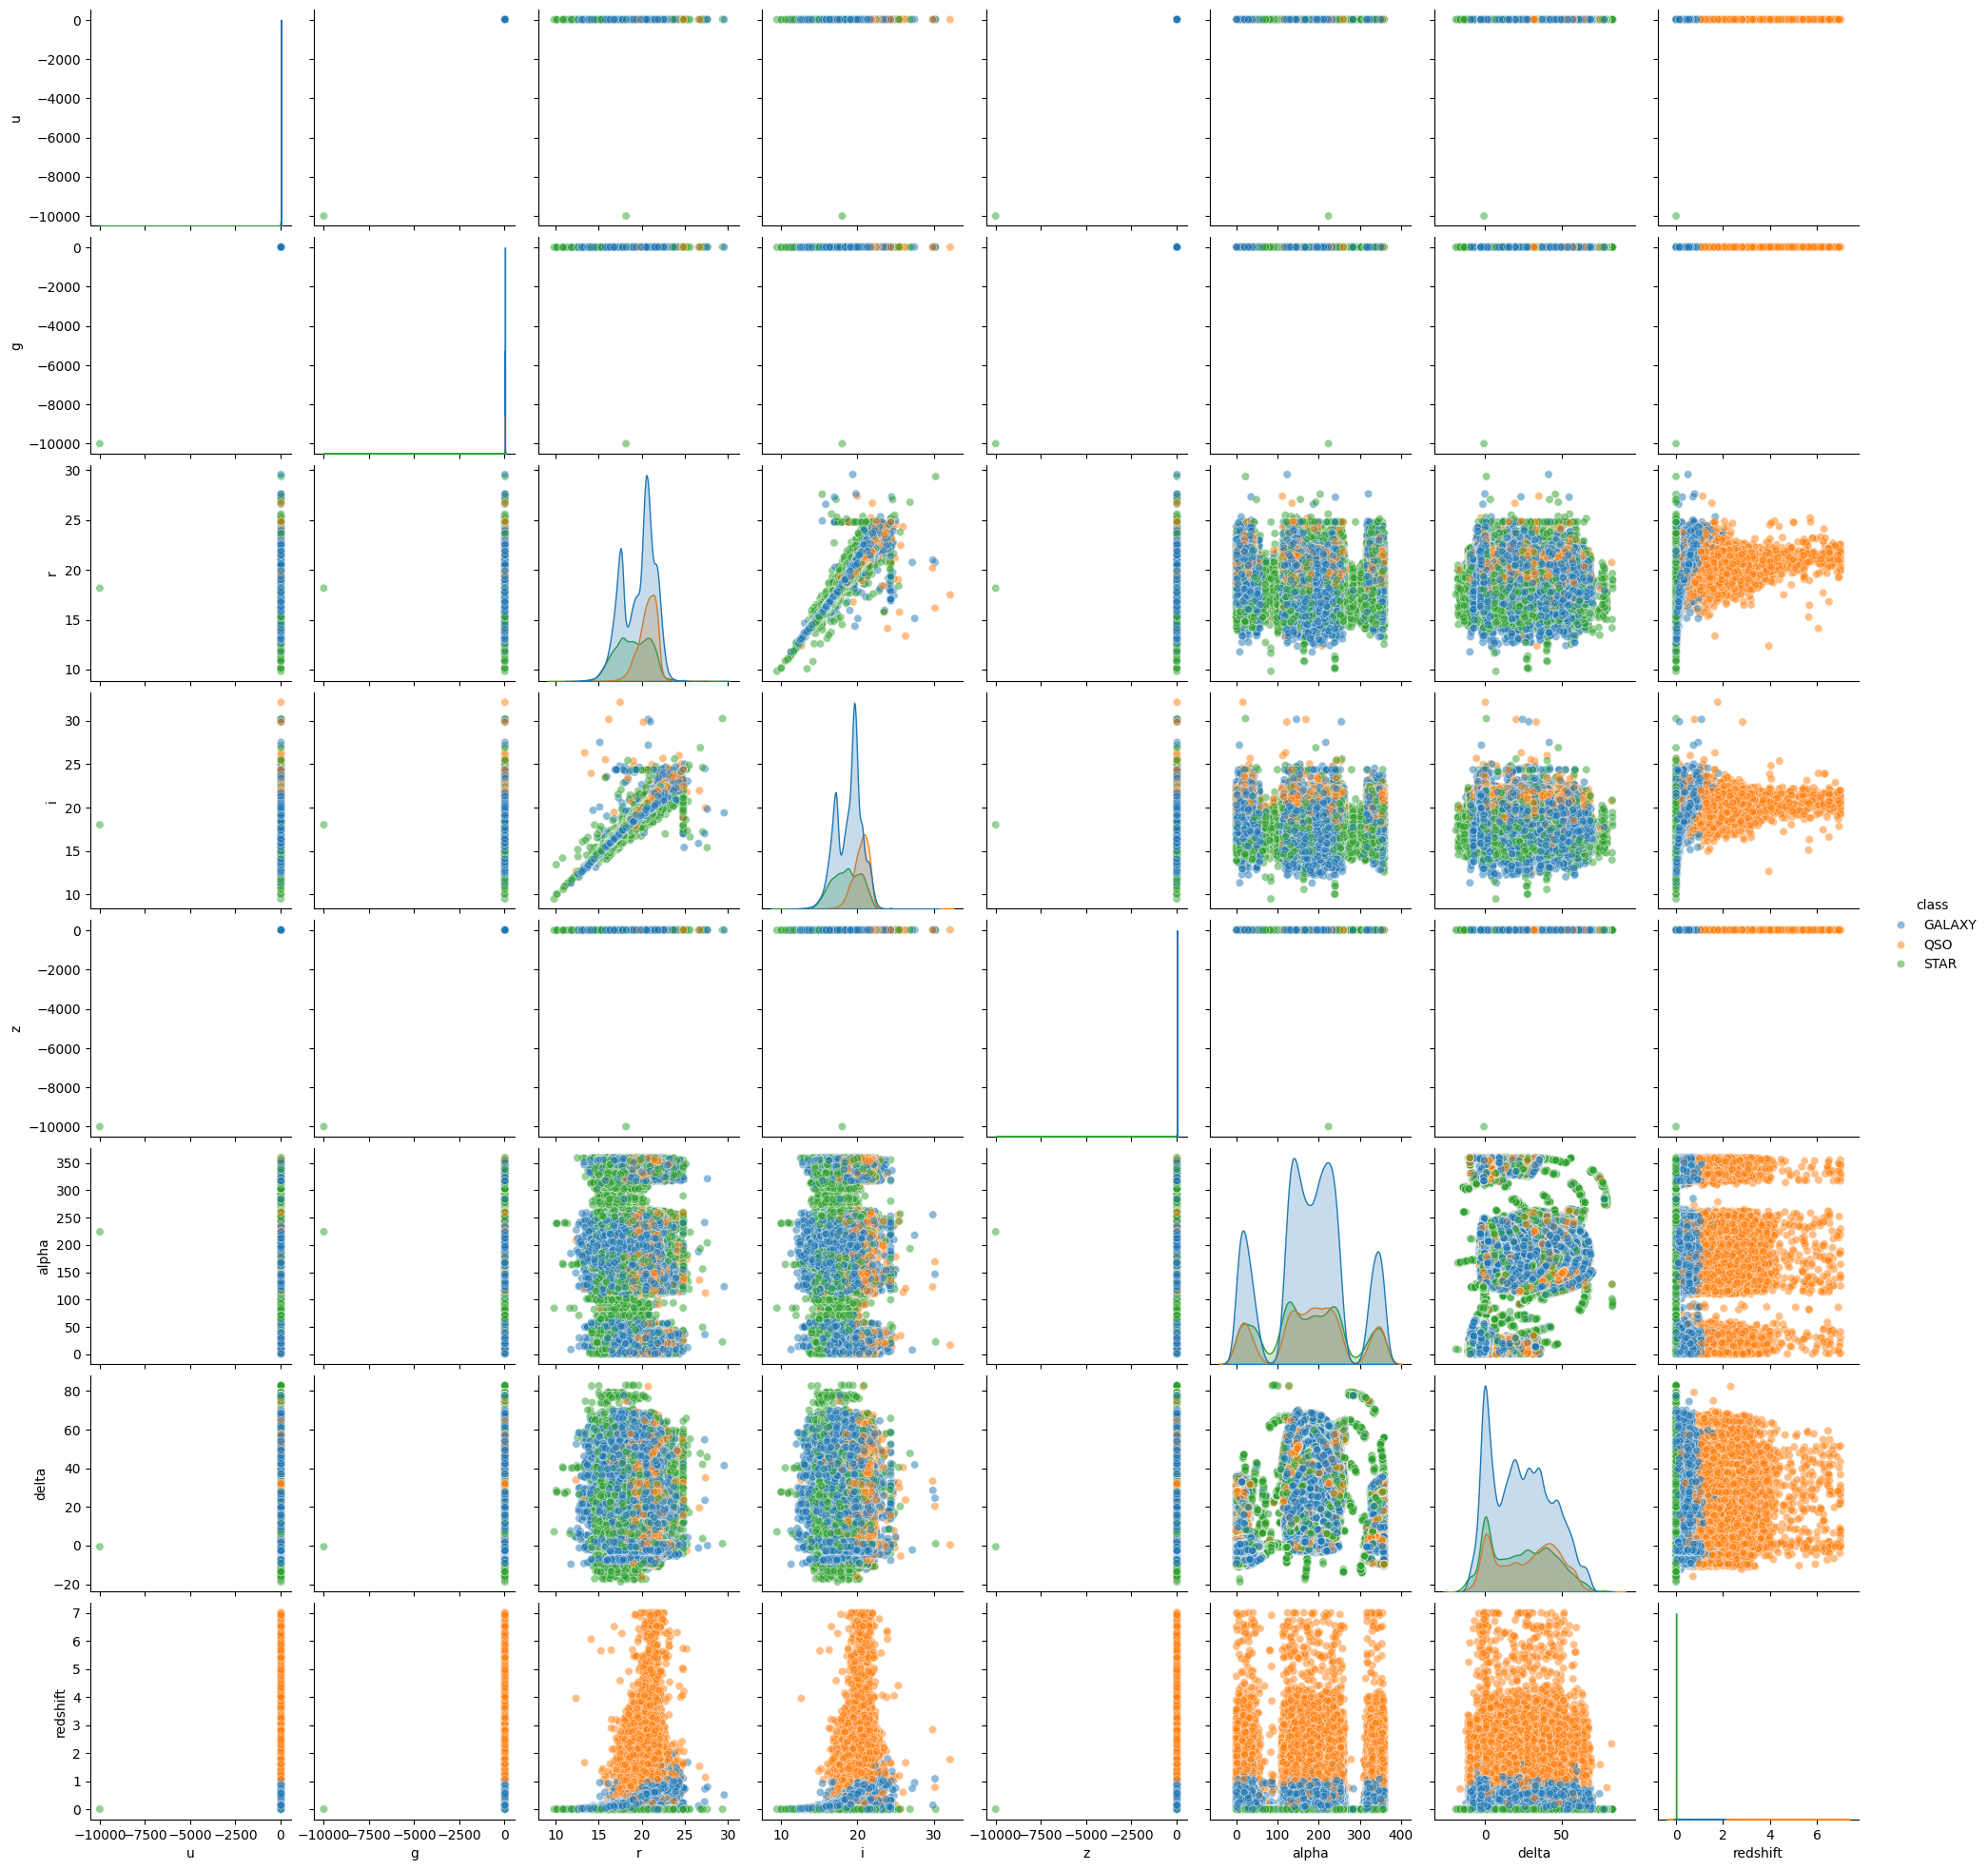

In [20]:
sns.pairplot(data[features + ['class']], hue='class', plot_kws={'alpha': 0.5})

plt.show()

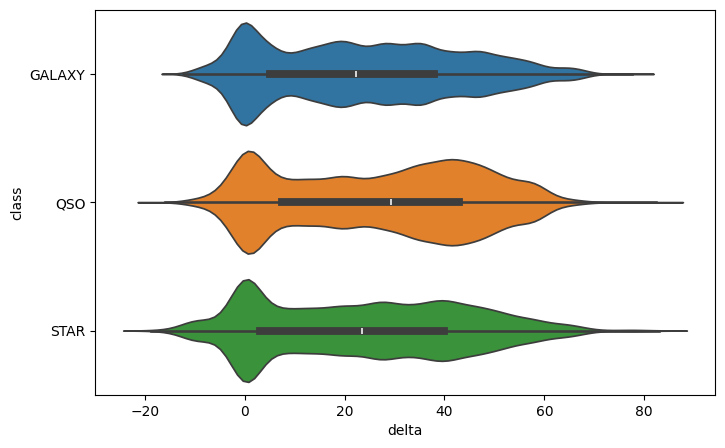

In [21]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x='delta', y='class', inner='box', hue='class')

plt.show()

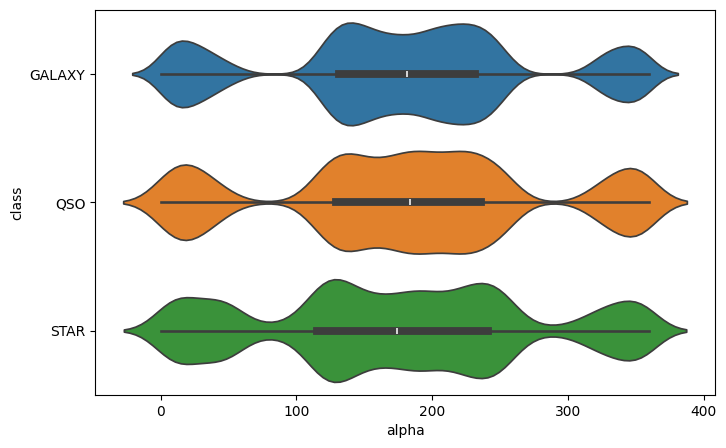

In [22]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=data, x='alpha', y='class', inner='box', hue='class')

plt.show()

This graph may come in handy later:

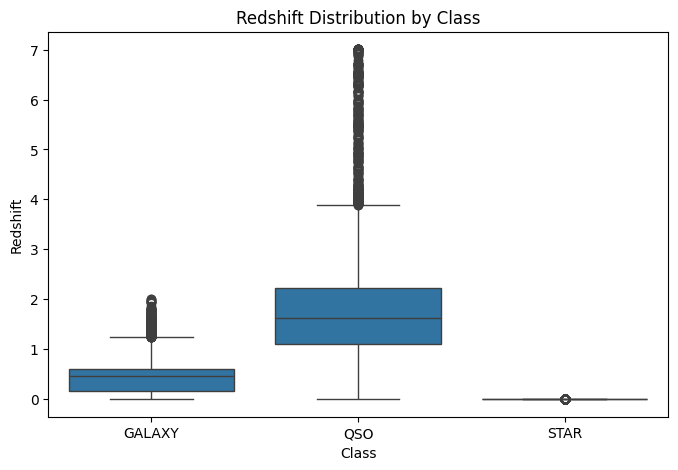

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='redshift', data=data)
plt.title('Redshift Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Redshift')

plt.show()

From the boxplot we can see that the dataset exhibits the presence of outliers, which are data points that deviate significantly from the overall distribution or expected patterns within the dataset. Identifying and addressing these outliers is critical, as they can disproportionately influence our model performance!

The provided code below defines a function, designed to eliminate outliers from specified columns using the Interquartile Range (IQR) method. This approach calculates the IQR, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data, to identify outliers as values that fall below Q1 or above Q3 by a factor determined by a customizable multiplier (defaulting to 3). For each column specified, the function computes lower and upper bounds based on the IQR and filters the dataframe to retain only rows where the column values lie within these bounds

In [27]:
def remove_outliers_iqr(df, columns, multiplier=3):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [28]:
data_cleaned = remove_outliers_iqr(data, features)

In [29]:
data_cleaned.shape

(97759, 18)

The cleaned dataset, stripped of outliers, will be analyzed to confirm the number of rows retained, ensuring a balance between data integrity and the removal of potentially problematic values

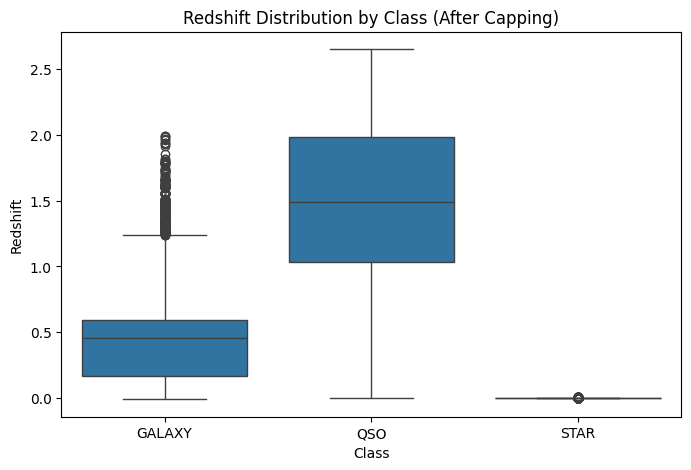

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='redshift', data=data_cleaned)
plt.title('Redshift Distribution by Class (After Capping)')
plt.xlabel('Class')
plt.ylabel('Redshift')
plt.show()

We still observe some outliers, but at this point, we believe that we have completed sufficient data visualization. 

A good practice moving forward is to scale the data, as this often improves the performance and accuracy of our algorithms. But first let's binarize the labels of the dataframe

In [33]:
# Same logic as LabelEncoder from Sklearn
new_classes = []

for i in data_cleaned["class"]:
    if i == "GALAXY":
        new_classes.append(0)
    elif i == "STAR":
        new_classes.append(1)
    else:
        new_classes.append(2)

data_cleaned["new_class"] = new_classes

In [34]:
X = data_cleaned[features]
y = data_cleaned['new_class'] #binarized!!

In [35]:
scaler = StandardScaler()
data_n = scaler.fit_transform(X)

In [36]:
(data_n.shape, y.shape)

((97759, 8), (97759,))

Next, let's visualize the correlation between the features to better understand the relationships and dependencies within the dataset

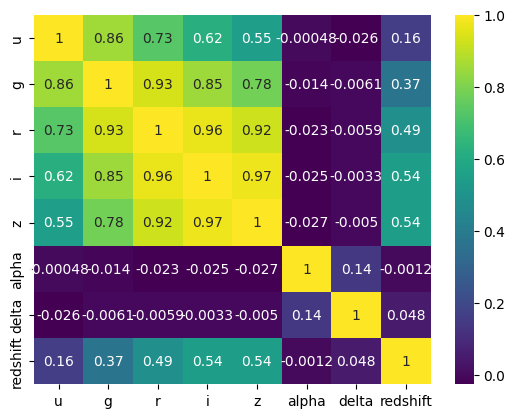

In [38]:
sns.heatmap(X.corr(), cmap='viridis', annot=True)
plt.show()

The variables g, r, i, and z show very high positive correlations with each other

---

### Clustering (excluding Redshift)

We will select the following photometric features, and partition them...

In [43]:
photometric_features = ['u', 'g', 'r', 'i', 'z']
photometric_indices = [features.index(f) for f in photometric_features]

X_photometry = data_n[:, photometric_indices]

In [44]:
X_train_photometry, X_test_photometry, y_train, y_test = train_test_split(X_photometry, y, test_size=0.2, random_state=42)

In [45]:
(X_train_photometry.shape, X_test_photometry.shape), (y_train.value_counts(), y_test.value_counts())

(((78207, 5), (19552, 5)),
 (new_class
  0    47559
  1    17306
  2    13342
  Name: count, dtype: int64,
  new_class
  0    11881
  1     4285
  2     3386
  Name: count, dtype: int64))

We observe slight imbalances in the classes of our dataframe...

We use stratify = y in train_test_split method in order to solve the class imbalances since it ensures that the train and test splits maintain the same proportion of each class as in the original dataset!

In [48]:
X_train_photometry, X_test_photometry, y_train, y_test = train_test_split(X_photometry, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
(X_train_photometry.shape, X_test_photometry.shape), (y_train.value_counts(), y_test.value_counts())

(((78207, 5), (19552, 5)),
 (new_class
  0    47552
  1    17273
  2    13382
  Name: count, dtype: int64,
  new_class
  0    11888
  1     4318
  2     3346
  Name: count, dtype: int64))

The inertia and silhouette scores will be visualized through graphical representation

In [51]:
kmeans_results = {}
silhouette_scores = []

In [52]:
for k in range(2, 10):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_photometry)
    cluster_labels = kmeans.predict(X_test_photometry)
    inertia = kmeans.inertia_

    # At least two unique clusters
    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(X_test_photometry, cluster_labels)
        silhouette_scores.append((k, silhouette, inertia))
    else:
        silhouette_scores.append((k, None, inertia))

    kmeans_results[k] = cluster_labels

In [53]:
# Extract k-values, silhouette, inertia and purity scores
k_values, k_silhouettes, inertias = zip(*[(k, silhouette, inertia) for k, silhouette, inertia in silhouette_scores])

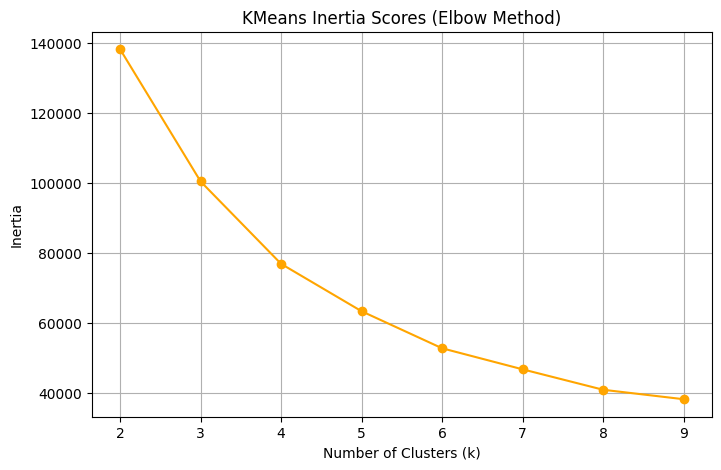

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', color='orange')
plt.title("KMeans Inertia Scores (Elbow Method)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

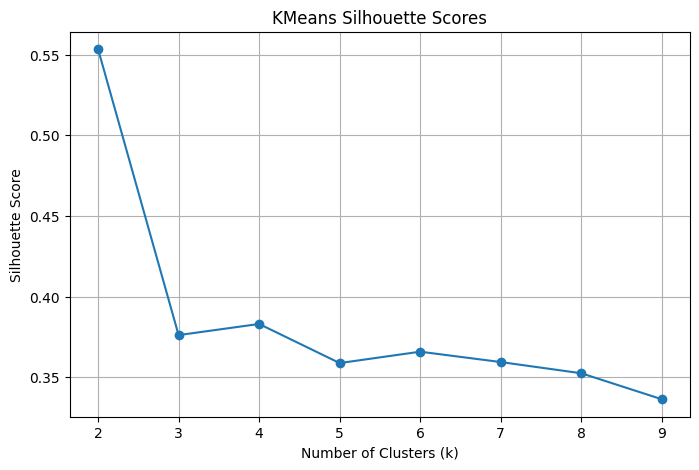

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, k_silhouettes, marker='o')
plt.title("KMeans Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

The two graphs provide insights into selecting the optimal number of clusters for the KMeans algorithm. The Inertia Scores (Elbow Method) graph shows a steep decrease in inertia as the number of clusters increases from 2 to 4, with a noticeable "elbow" at k=4. This suggests that adding more clusters beyond this point results in diminishing improvements in compactness, making k=4 a potential candidate for the optimal number of clusters.

The Silhouette Scores graph, however, reveals that the highest score occurs at k=2, indicating strong cluster separation at this level. As k increases, the silhouette score declines, stabilizing around 0.35–0.4 for k=3 to k=5. While k=2 achieves the best separation, it may oversimplify the data. A balance between compactness (inertia) and separability (silhouette score) suggests that k=3 or k=4 would be ideal, with k=3 offering a good trade-off between the two metrics and k=4 providing slightly finer-grained clustering

We will employ cross-validation as a systematic approach to evaluate clustering performance across different hyperparameter configurations (specifically k=3,4,5). This method ensures a rigorous and comprehensive assessment of the model's robustness and generalizability, providing insights into its behavior under varying conditions

In [58]:
param_grid = {
    'n_clusters': [3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
    'algorithm': ['lloyd', 'elkan']
}

In [59]:
# Define cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results = []

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            silhouette_scores = []
            for train_idx, val_idx in kf.split(X_train_photometry):
                # Split data into train and validation sets
                X_train_cv, X_val_cv = X_train_photometry[train_idx], X_train_photometry[val_idx]
                
                # Fit on training fold
                kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
                cluster_labels = kmeans.fit_predict(X_train_cv)
                
                # Predict on validation set
                val_pred_labels = kmeans.predict(X_val_cv)
                
                # Ensure that there are at least two clusters
                if len(set(val_pred_labels)) > 1:
                    val_silhouette = silhouette_score(X_val_cv, val_pred_labels)
                    silhouette_scores.append(val_silhouette)
                else:
                    # If only one cluster, add NaN
                    silhouette_scores.append(np.nan)

            avg_silhouette = np.nanmean(silhouette_scores)
            results.append({
                'n_clusters': n_clusters,
                'init': init,
                'max_iter': max_iter,
                'avg_silhouette': avg_silhouette
            })

best_result = max(results, key=lambda x: x['avg_silhouette'])

print('Best Hyperparameters:')
print(best_result)

Best Hyperparameters:
{'n_clusters': 4, 'init': 'k-means++', 'max_iter': 100, 'avg_silhouette': 0.38703575123469697}


Let’s now proceed to visualize the Confusion Matrix

In [61]:
y_true = y[:len(X_test_photometry)]

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_train_photometry)
kmeans_labels = kmeans.predict(X_test_photometry)

In [63]:
cm_kmeans = confusion_matrix(y_true, kmeans_labels)

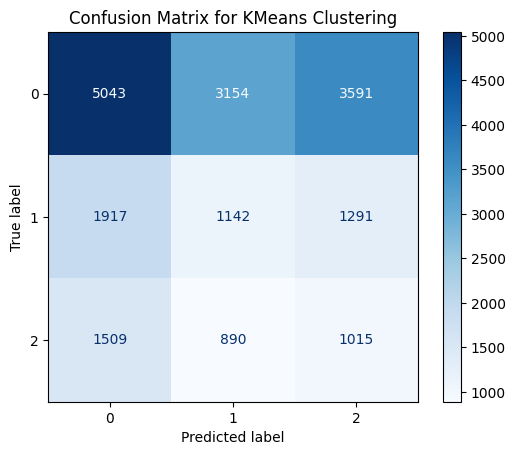

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KMeans Clustering")
plt.show()

We will calculate the average redshift for each cluster to determine if there are any noticeable differences in redshift. By incorporating this information, we may improve our ability to distinguish between the clusters

In [66]:
redshift_index = features.index('redshift')
redshift = data_n[:len(X_test_photometry), redshift_index]

In [67]:
def get_cluster_redshift_avg(labels, redshift):
    unique_labels = np.unique(labels)
    avg_redshifts = {}
    for label in unique_labels:
        if label != -1:  # Skip noise points for DBSCAN (but it doesn't matter anymore)
            avg_redshifts[label] = np.mean(redshift[labels == label])
    return avg_redshifts

In [68]:
cluster_redshifts  = get_cluster_redshift_avg(kmeans_labels, redshift)

print("Average redshift for each KMeans cluster:")
for cluster, avg_redshift in cluster_redshifts.items():
    print(f"Cluster {cluster}: Average Redshift = {avg_redshift}")

Average redshift for each KMeans cluster:
Cluster 0: Average Redshift = -0.001109795724693547
Cluster 1: Average Redshift = -0.00904543951021392
Cluster 2: Average Redshift = 7.536444744357486e-05


There is a distinction from each cluster considering the value of redshift...

Let's plot the clustering outcome by selecting the 3rd and 4th feature

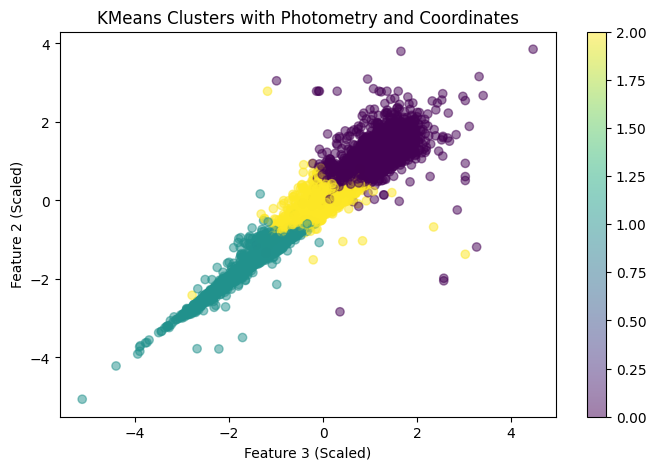

In [71]:
feature_1 = X_test_photometry[:, 0]  # First feature
feature_2 = X_test_photometry[:, 1]  # Second feature
feature_3 = X_test_photometry[:, 2]  # ...
feature_4 = X_test_photometry[:, 3]

plt.figure(figsize=(8, 5))
scatter = plt.scatter(feature_4, feature_3, c=kmeans_labels, cmap='viridis', alpha=0.5)

plt.colorbar(scatter)

plt.title("KMeans Clusters with Photometry and Coordinates")
plt.xlabel("Feature 3 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")

plt.show()

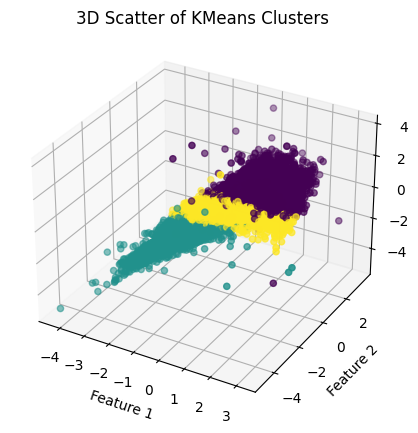

In [72]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_photometry[:, 0], X_test_photometry[:, 1], X_test_photometry[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Scatter of KMeans Clusters')

plt.show()

### Clustering (including Redshift)

The same procedures performed in the previous cells will be repeated, with the inclusion of redshift in the training data to assess its impact on the analysis

In [75]:
supervised_features = photometric_features + ['redshift']  # Combine features
supervised_indices = [features.index(f) for f in supervised_features]

X_supervised = data_n[:, supervised_indices]
y = data_cleaned['new_class']

In [76]:
X_train_supervised, X_test_supervised, y_train_supervised, y_test_supervised = train_test_split(X_supervised, y, test_size=0.2, random_state=42)

In [77]:
X_train_scaled = scaler.fit_transform(X_train_supervised)
X_test_scaled = scaler.transform(X_test_supervised)

In [78]:
kmeans_results = {}
silhouette_scores = []

In [79]:
for k in range(2, 10):

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    cluster_labels = kmeans.predict(X_test_scaled)
    inertia = kmeans.inertia_

    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(X_test_scaled, cluster_labels)
        silhouette_scores.append((k, silhouette, inertia))
    else:
        silhouette_scores.append((k, None, inertia))

    kmeans_results[k] = cluster_labels

In [80]:
k_values, k_silhouettes, inertias = zip(*[(k, silhouette, inertia) for k, silhouette, inertia in silhouette_scores])

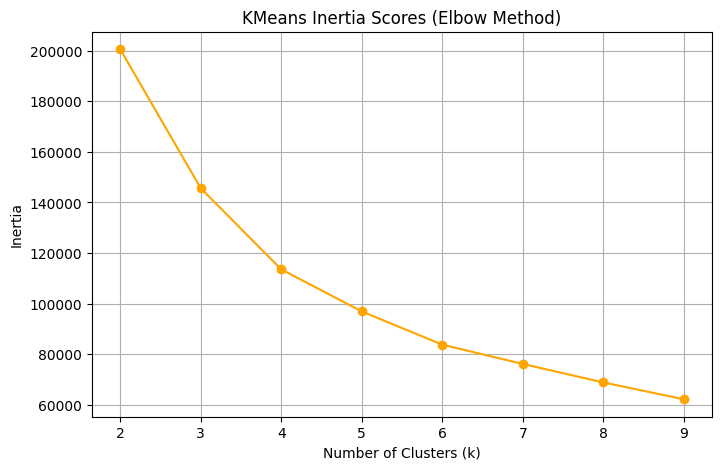

In [81]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', color='orange')
plt.title("KMeans Inertia Scores (Elbow Method)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

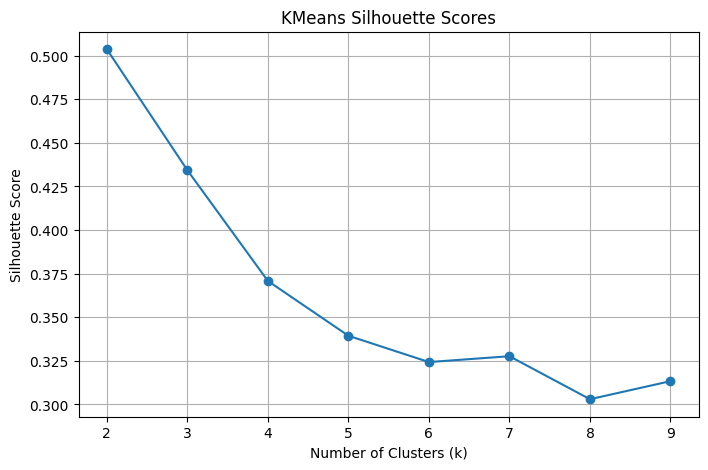

In [82]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, k_silhouettes, marker='o')
plt.title("KMeans Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [83]:
param_grid = {
    'n_clusters': [3, 4, 5],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500, 800, 1000, 2000],
    'algorithm': ['lloyd', 'elkan']
}

In [84]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results = []

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            silhouette_scores = []
            
            for train_idx, val_idx in kf.split(X_train_scaled):
                X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
                
                kmeans = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, random_state=42)
                kmeans.fit(X_train_cv)
                
                val_labels = kmeans.predict(X_val_cv)
                
                if len(set(val_labels)) > 1:
                    val_silhouette = silhouette_score(X_val_cv, val_labels)
                    silhouette_scores.append(val_silhouette)
                else:
                    silhouette_scores.append(np.nan)
            
            avg_silhouette = np.nanmean(silhouette_scores)
            results.append({
                'n_clusters': n_clusters,
                'init': init,
                'max_iter': max_iter,
                'avg_silhouette': avg_silhouette
            })

best_result = max(results, key=lambda x: x['avg_silhouette'])

print("Best Hyperparameters:")
print(best_result)

Best Hyperparameters:
{'n_clusters': 3, 'init': 'k-means++', 'max_iter': 100, 'avg_silhouette': 0.4360433111822196}


In [85]:
y_true = y_test_supervised

In [86]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.predict(X_test_scaled)

cm_kmeans = confusion_matrix(y_true, kmeans_labels)

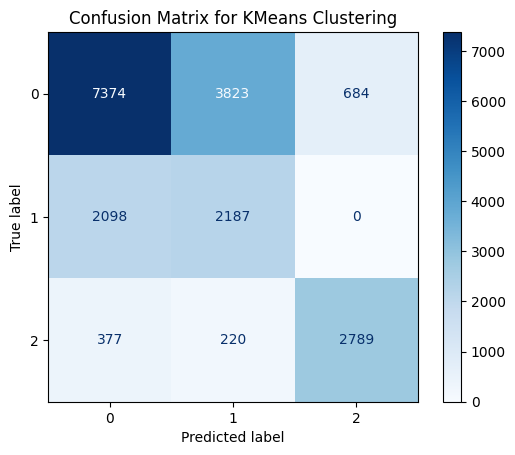

In [87]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kmeans)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KMeans Clustering")
plt.show()

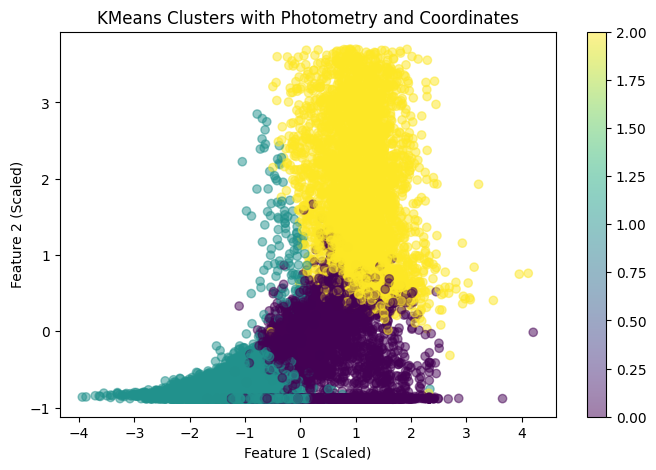

In [88]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_test_scaled[:, 4], X_test_scaled[:, 5], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title("KMeans Clusters with Photometry and Coordinates")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

### Impact of Redshift on Clustering Performance (KMeans)

By implementing a paired T-test we can also come to the conlusion that the addition of redshift improves the clustering quality

In [91]:
X_no_redshift = X_photometry
scores_no_redshift = []
scores_with_redshift = []

In [92]:
#--- Cross-validation without redshift ---

# Using KFold to split the data
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop through the splits
for train_index, test_index in kf.split(X_no_redshift):
    X_train, X_test = X_no_redshift[train_index], X_no_redshift[test_index]

    # Apply KMeans
    kmeans_no_redshift = KMeans(n_clusters=3, random_state=42)
    kmeans_no_redshift.fit(X_train)
    
    # Compute silhouette score
    cluster_labels_no_redshift = kmeans_no_redshift.predict(X_test)
    silhouette_no_redshift = silhouette_score(X_test, cluster_labels_no_redshift)
    scores_no_redshift.append(silhouette_no_redshift)

In [93]:
#--- Cross-validation with redshift ---

# Loop through splits
for train_index, test_index in kf.split(X_supervised):
    X_train, X_test = X_supervised[train_index], X_supervised[test_index]

    kmeans_with_redshift = KMeans(n_clusters=3, random_state=42)
    kmeans_with_redshift.fit(X_train)
    
    cluster_labels_with_redshift = kmeans_with_redshift.predict(X_test)
    silhouette_with_redshift = silhouette_score(X_test, cluster_labels_with_redshift)
    scores_with_redshift.append(silhouette_with_redshift)

In [94]:
# Results
print(f"Mean Silhouette Score without Redshift: {np.mean(scores_no_redshift)}")
print(f"Mean Silhouette Score with Redshift: {np.mean(scores_with_redshift)}")

Mean Silhouette Score without Redshift: 0.37821544316163813
Mean Silhouette Score with Redshift: 0.43506320674755283


In [95]:
# Paired T-Test
t_stat, p_value = ttest_rel(scores_with_redshift, scores_no_redshift)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in clustering quality is statistically significant.")
else:
    print("The difference in clustering quality is not statistically significant.")

T-statistic: 48.920639307906875, P-value: 3.1244440408772123e-12
The difference in clustering quality is statistically significant.


---

### Augment Data

In this approach, we first use KMeans clustering on the training data to create cluster labels. These labels are then added as extra features to the training data. We train a RandomForest classifier using this augmented dataset. The test data is also augmented with cluster labels predicted by the KMeans model trained on the training data. We then use the trained classifier to make predictions on the test data. Finally, we evaluate the model's performance with a classification report and accuracy score

In [99]:
kmeans_labels_train = kmeans.fit_predict(X_train_scaled)

# Augment training data with cluster labels
X_train_augmented = np.hstack([X_train_scaled, kmeans_labels_train.reshape(-1, 1)])

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_augmented, y_train_supervised)

# Augment test data with cluster labels predicted by the KMeans model trained on training data
kmeans_labels_test = kmeans.predict(X_test_scaled)
X_test_augmented = np.hstack([X_test_scaled, kmeans_labels_test.reshape(-1, 1)])

predictions = classifier.predict(X_test_augmented)
accuracy = accuracy_score(y_test_supervised, predictions)

In [100]:
print("Classification Report:")
print(classification_report(y_test_supervised, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11881
           1       0.99      1.00      1.00      4285
           2       0.96      0.92      0.94      3386

    accuracy                           0.98     19552
   macro avg       0.98      0.97      0.97     19552
weighted avg       0.98      0.98      0.98     19552



In [101]:
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9787


In [102]:
X_train_augmented.shape

(78207, 7)

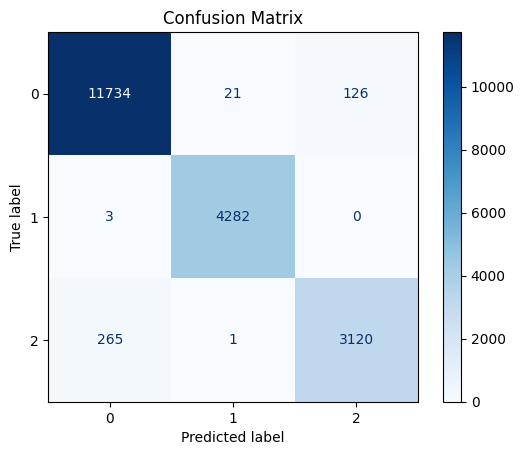

In [103]:
cm = confusion_matrix(y_test_supervised, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

To analyze the model's performance we will first identify the indices of the misclassified samples by comparing the predicted labels with the true labels. A subset of these misclassified instances is then displayed, showing their indices along with the true and predicted labels for closer examination. Finally, we will visualize the misclassifications by plotting the corresponding feature values, which helps to highlight potential patterns or areas where the model's predictions may be lacking or where further refinement is needed

In [105]:
# Find indices of misclassified samples
misclassified_indices = np.where(predictions != y_test_supervised)[0]

print("Misclassified Samples:")
for idx in misclassified_indices[:10]:  # Show first 10
    print(f"True Label: {y_test_supervised.iloc[idx]}, Predicted: {predictions[idx]}")

Misclassified Samples:
True Label: 0, Predicted: 1
True Label: 2, Predicted: 0
True Label: 2, Predicted: 0
True Label: 2, Predicted: 0
True Label: 0, Predicted: 2
True Label: 2, Predicted: 0
True Label: 2, Predicted: 0
True Label: 0, Predicted: 2
True Label: 0, Predicted: 2
True Label: 0, Predicted: 2


In [106]:
misclassified_true_labels = y_test_supervised.to_numpy()[misclassified_indices]
misclassified_samples = X_test_supervised[misclassified_indices]
misclassified_pred_labels = predictions[misclassified_indices]

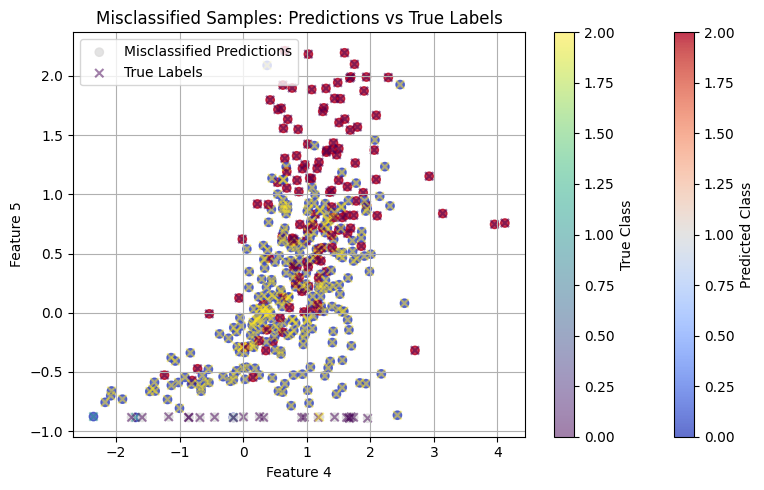

In [107]:
feature1 = 4 # For example
feature2 = 5

plt.figure(figsize=(8, 5))

sc_pred = plt.scatter(
    misclassified_samples[:, feature1],
    misclassified_samples[:, feature2],
    c=misclassified_pred_labels,  # Use predicted labels for color
    cmap='coolwarm',
    marker='o',  # Circle markers for misclassified
    label='Misclassified Predictions',
    alpha=0.8
)

sc_true = plt.scatter(
    misclassified_samples[:, feature1],
    misclassified_samples[:, feature2],
    c=misclassified_true_labels,  # Use true labels for color
    cmap='viridis',
    marker='x',  # Cross markers for true
    label='True Labels',
    alpha=0.5
)

plt.title("Misclassified Samples: Predictions vs True Labels")
plt.xlabel(f"Feature {feature1}")
plt.ylabel(f"Feature {feature2}")

# Colorbars
cbar_pred = plt.colorbar(sc_pred, label="Predicted Class")
cbar_true = plt.colorbar(sc_true, label="True Class")


plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

---

In this section we will calculate the feature importances from the trained RandomForest classifier as an example. It combines the photometric features with 'redshift' and 'cluster_label' to form the full feature set

In [110]:
# Feature importances
importances = classifier.feature_importances_
features = photometric_features + ['redshift', 'cluster_label', 'alpha', 'delta']  # Include cluster_label
feature_importances = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

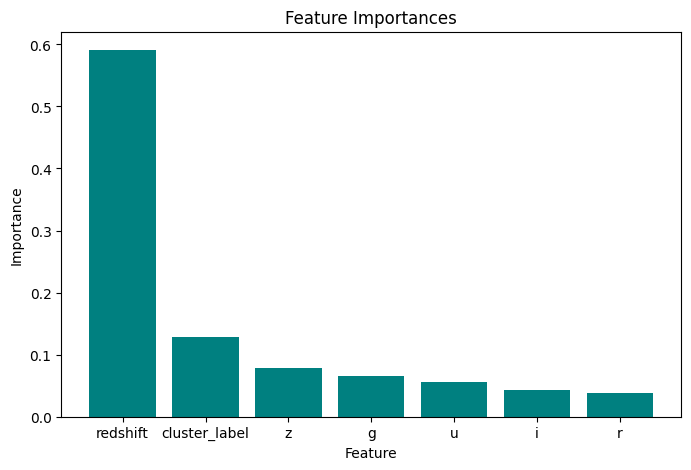

In [111]:
plt.figure(figsize=(8, 5))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances], color='teal')
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

As previously discussed, redshift plays a crucial role in the analysis, significantly influencing the observed results

---

### 4) Classification

We will incorporate a variety of classifiers into our analysis and compare their accuracy to identify the most effective model for our dataset

In [116]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42)
}

evaluation_metrics = {}
predictions = {}

In [117]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_supervised, y_train_supervised)
    predictions[model_name] = model.predict(X_test_supervised)

Training Logistic Regression...
Training Decision Tree...
Training K-Nearest Neighbors...
Training Random Forest...
Training SVM...


In [118]:
def evaluate_model(name, y_true, y_pred, classes):
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_true, y_pred))

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
    }

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='viridis')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    return metrics


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11881
           1       0.95      1.00      0.97      4285
           2       0.94      0.86      0.90      3386

    accuracy                           0.95     19552
   macro avg       0.95      0.94      0.95     19552
weighted avg       0.95      0.95      0.95     19552



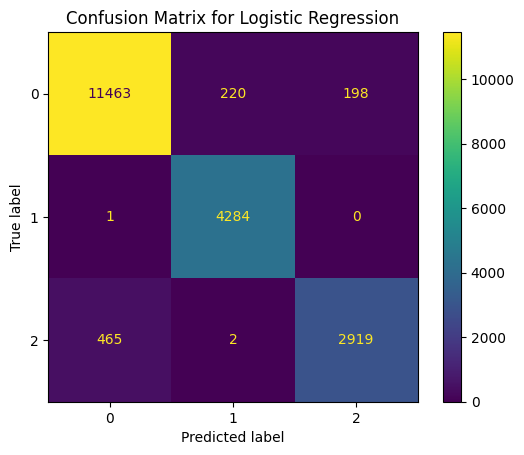


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11881
           1       0.99      0.99      0.99      4285
           2       0.90      0.91      0.91      3386

    accuracy                           0.96     19552
   macro avg       0.96      0.96      0.96     19552
weighted avg       0.96      0.96      0.96     19552



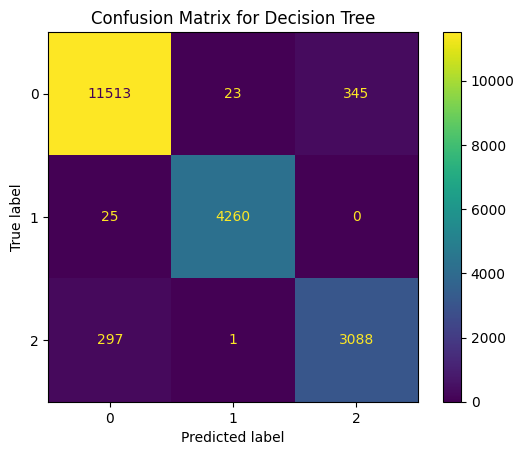


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11881
           1       0.95      0.99      0.97      4285
           2       0.96      0.92      0.94      3386

    accuracy                           0.96     19552
   macro avg       0.96      0.96      0.96     19552
weighted avg       0.96      0.96      0.96     19552



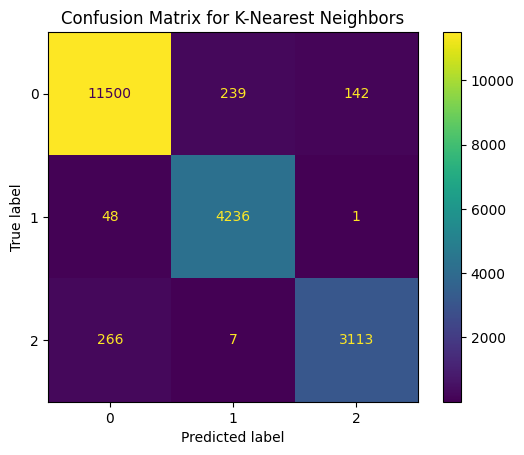


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11881
           1       1.00      1.00      1.00      4285
           2       0.96      0.92      0.94      3386

    accuracy                           0.98     19552
   macro avg       0.98      0.97      0.97     19552
weighted avg       0.98      0.98      0.98     19552



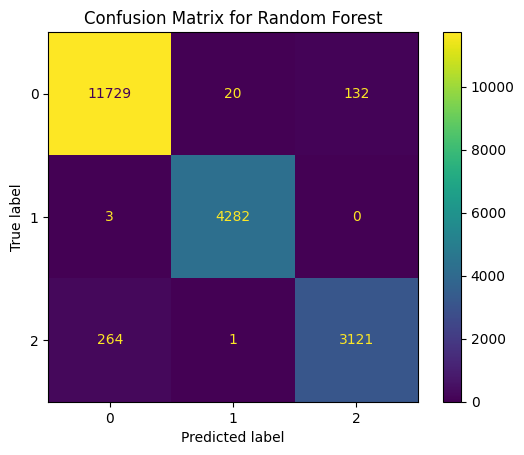


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11881
           1       0.95      1.00      0.97      4285
           2       0.97      0.90      0.93      3386

    accuracy                           0.97     19552
   macro avg       0.96      0.96      0.96     19552
weighted avg       0.97      0.97      0.96     19552



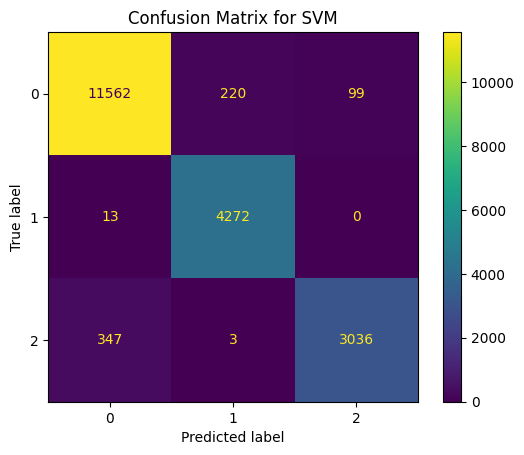

In [119]:
for model_name, y_pred in predictions.items():
    evaluation_metrics[model_name] = evaluate_model(
        model_name, y_test_supervised, y_pred, models["Logistic Regression"].classes_
    )

In [120]:
for model_name, metrics in evaluation_metrics.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Metrics for Logistic Regression:
Accuracy: 0.9547
Precision: 0.9545
Recall: 0.9547
F1 Score: 0.9542

Metrics for Decision Tree:
Accuracy: 0.9647
Precision: 0.9648
Recall: 0.9647
F1 Score: 0.9647

Metrics for K-Nearest Neighbors:
Accuracy: 0.9640
Precision: 0.9642
Recall: 0.9640
F1 Score: 0.9640

Metrics for Random Forest:
Accuracy: 0.9785
Precision: 0.9784
Recall: 0.9785
F1 Score: 0.9784

Metrics for SVM:
Accuracy: 0.9651
Precision: 0.9653
Recall: 0.9651
F1 Score: 0.9649


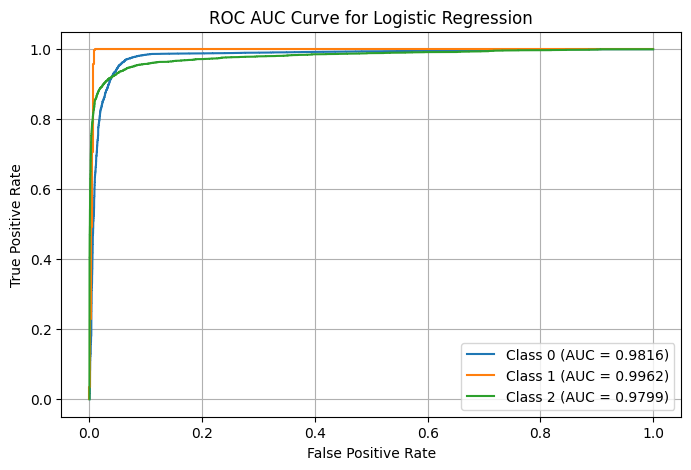

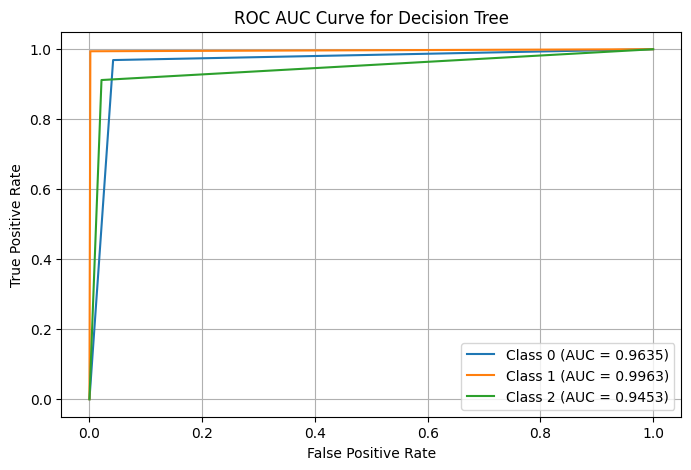

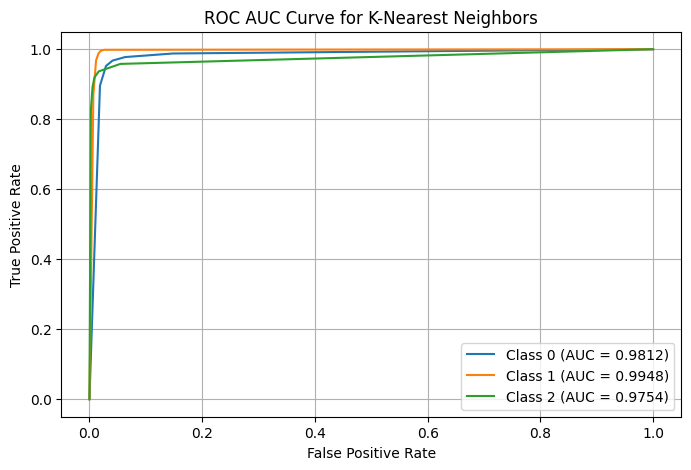

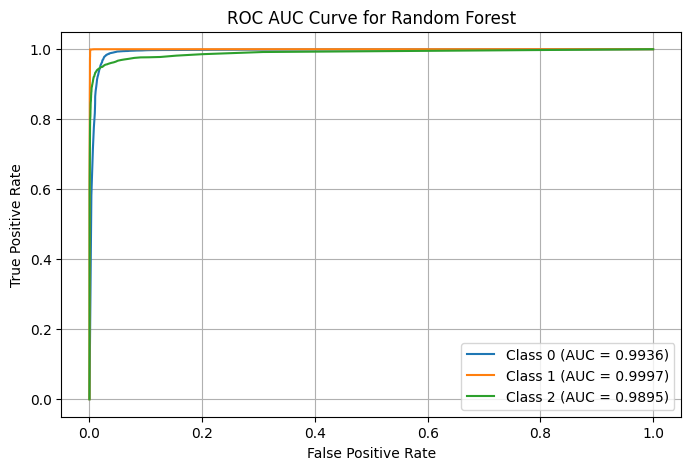

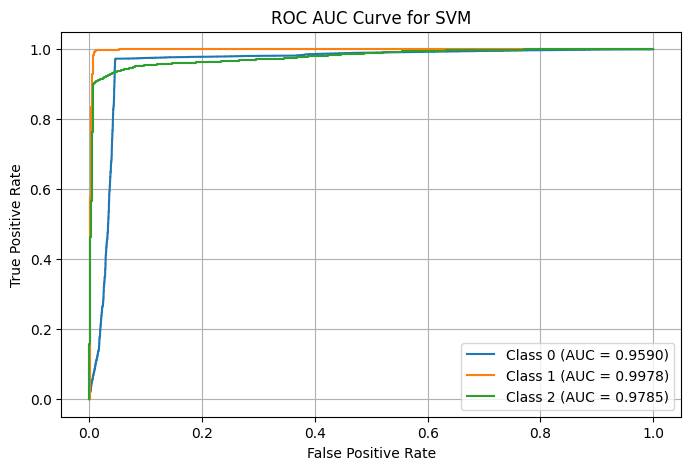

In [121]:
classes = models["Logistic Regression"].classes_
y_test_bin = label_binarize(y_test_supervised, classes=classes) # Binarize!

for model_name, model in models.items():
    try:
        # Use predict_proba
        y_score = model.predict_proba(X_test_supervised)
    except AttributeError:
        try:
            # If not use
            y_score = model.decision_function(X_test_supervised)
        except AttributeError:
            print(f"Model {model_name} does not support probability or decision scores.")
            continue

    plt.figure(figsize=(8, 5))

    # ROC curve
    for i, class_label in enumerate(classes):
        # We get (FPR) and (TPR)
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        
        # AUC
        roc_auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.4f})")

    plt.title(f"ROC AUC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [122]:
# Based on Accuracy
best_model = max(evaluation_metrics.items(), key=lambda x: x[1]['Accuracy'])

# Print the best model and its metrics
print("\nBest Model:")
print(f"Model: {best_model[0]}")
print("Metrics:")
for metric, value in best_model[1].items():
    print(f"{metric}: {value:.4f}")


Best Model:
Model: Random Forest
Metrics:
Accuracy: 0.9785
Precision: 0.9784
Recall: 0.9785
F1 Score: 0.9784


---

We will do the same process as before but now we will use the augmented dataset!

In [125]:
evaluation_metrics = {}
predictions = {}

In [126]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_augmented, y_train_supervised)
    predictions[model_name] = model.predict(X_test_augmented)

Training Logistic Regression...
Training Decision Tree...
Training K-Nearest Neighbors...
Training Random Forest...
Training SVM...



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     11881
           1       0.95      1.00      0.97      4285
           2       0.95      0.87      0.91      3386

    accuracy                           0.96     19552
   macro avg       0.95      0.95      0.95     19552
weighted avg       0.96      0.96      0.96     19552



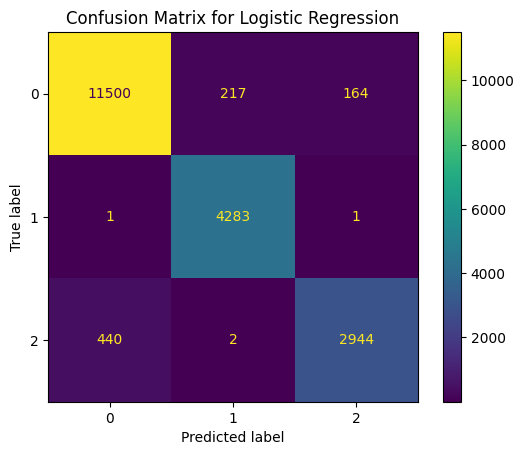


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11881
           1       0.99      0.99      0.99      4285
           2       0.90      0.91      0.90      3386

    accuracy                           0.96     19552
   macro avg       0.95      0.96      0.96     19552
weighted avg       0.96      0.96      0.96     19552



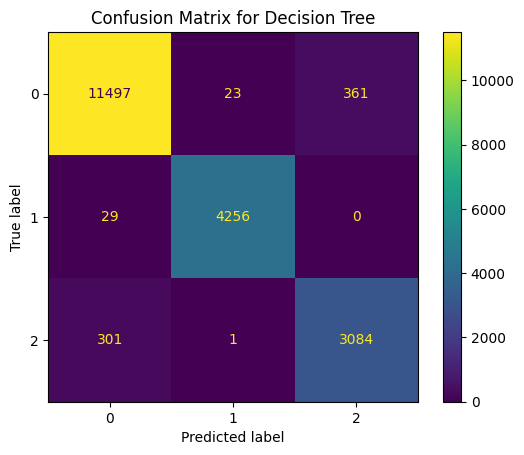


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11881
           1       0.94      0.99      0.97      4285
           2       0.96      0.92      0.94      3386

    accuracy                           0.96     19552
   macro avg       0.96      0.96      0.96     19552
weighted avg       0.96      0.96      0.96     19552



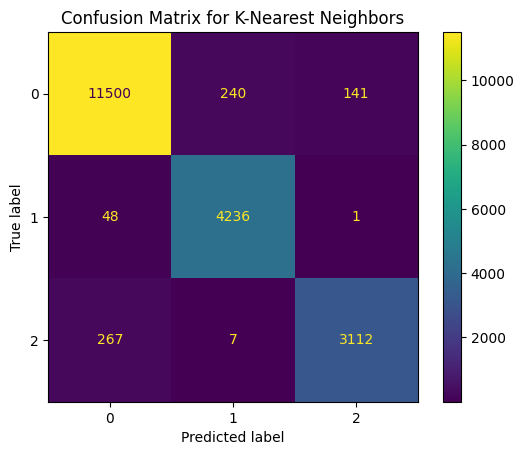


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11881
           1       0.99      1.00      1.00      4285
           2       0.96      0.92      0.94      3386

    accuracy                           0.98     19552
   macro avg       0.98      0.97      0.97     19552
weighted avg       0.98      0.98      0.98     19552



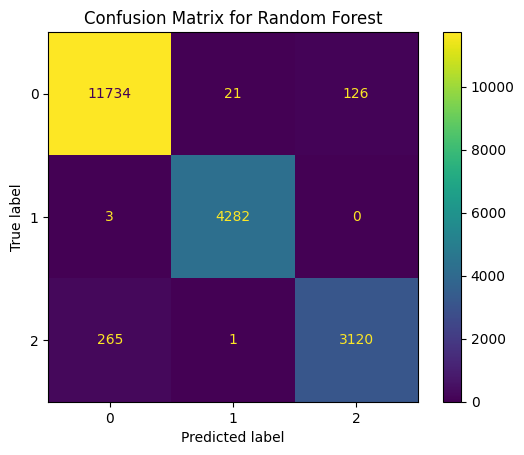


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11881
           1       0.95      1.00      0.97      4285
           2       0.97      0.89      0.93      3386

    accuracy                           0.96     19552
   macro avg       0.96      0.95      0.96     19552
weighted avg       0.96      0.96      0.96     19552



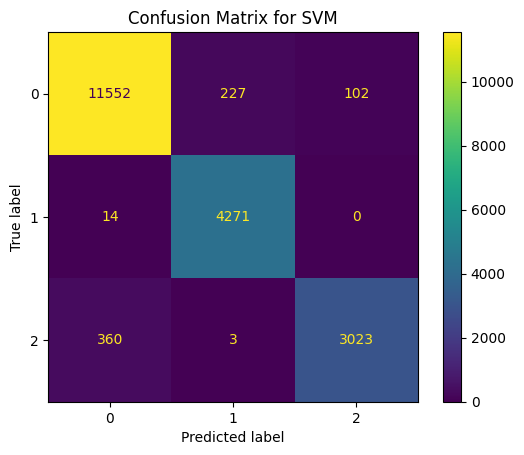

In [127]:
for model_name, y_pred in predictions.items():
    evaluation_metrics[model_name] = evaluate_model(
        model_name, y_test_supervised, y_pred, models["Logistic Regression"].classes_
    )

In [128]:
for model_name, metrics in evaluation_metrics.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Metrics for Logistic Regression:
Accuracy: 0.9578
Precision: 0.9577
Recall: 0.9578
F1 Score: 0.9573

Metrics for Decision Tree:
Accuracy: 0.9634
Precision: 0.9637
Recall: 0.9634
F1 Score: 0.9635

Metrics for K-Nearest Neighbors:
Accuracy: 0.9640
Precision: 0.9642
Recall: 0.9640
F1 Score: 0.9639

Metrics for Random Forest:
Accuracy: 0.9787
Precision: 0.9786
Recall: 0.9787
F1 Score: 0.9786

Metrics for SVM:
Accuracy: 0.9639
Precision: 0.9641
Recall: 0.9639
F1 Score: 0.9636


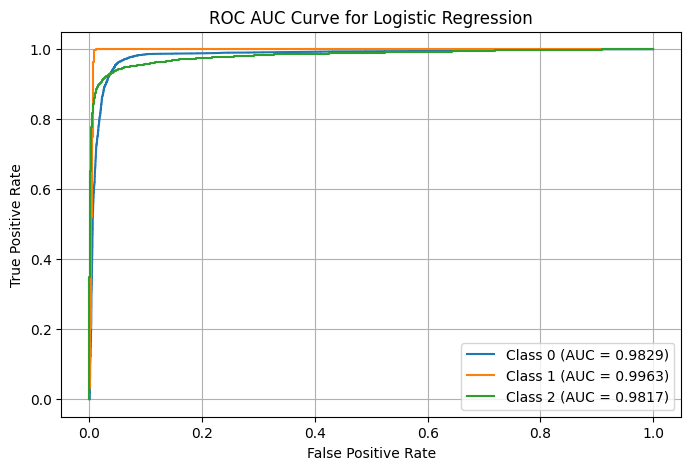

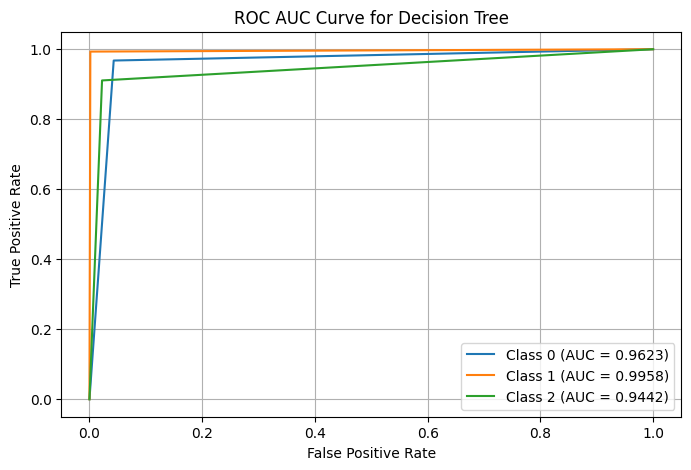

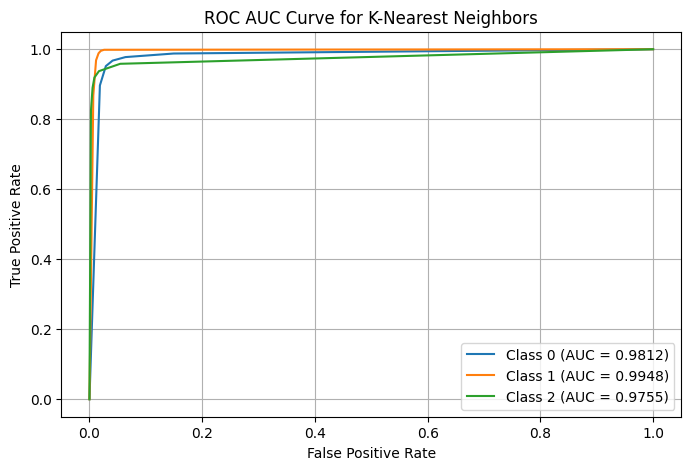

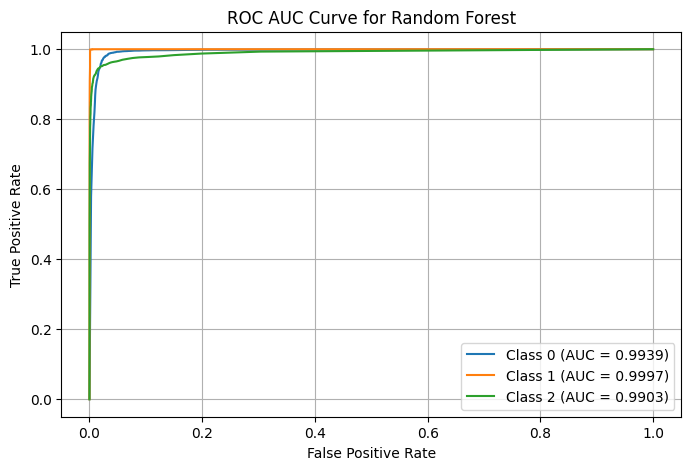

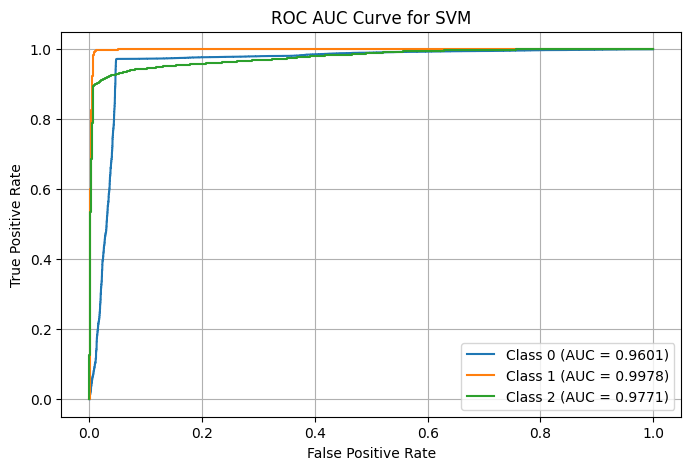

In [129]:
classes = models["Logistic Regression"].classes_
y_test_bin = label_binarize(y_test_supervised, classes=classes) # Binarize!

for model_name, model in models.items():
    try:
        y_score = model.predict_proba(X_test_augmented)
    except AttributeError:
        try:
            # If not
            y_score = model.decision_function(X_test_augmented)
        except AttributeError:
            print(f"Model {model_name} does not support probability or decision scores.")
            continue

    plt.figure(figsize=(8, 5))

    # ROC curve
    for i, class_label in enumerate(classes):
        # We get (FPR) and (TPR)
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        
        # AUC
        roc_auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {roc_auc:.4f})")

    plt.title(f"ROC AUC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [130]:
best_model = max(evaluation_metrics.items(), key=lambda x: x[1]['Accuracy'])

print("Best Model:")
print(f"Model: {best_model[0]}")
print("\nMetrics:")
for metric, value in best_model[1].items():
    print(f"{metric}: {value:.4f}")

Best Model:
Model: Random Forest

Metrics:
Accuracy: 0.9787
Precision: 0.9786
Recall: 0.9787
F1 Score: 0.9786


Τhe angle or slope of a Receiver Operating Characteristic (ROC) curve provides critical insights into the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for a binary classification model. This geometric characteristic of the ROC curve reflects the classifier's discriminative ability at various decision thresholds. A steeper initial slope, characterized by a high TPR with a correspondingly low FPR, indicates a model capable of effectively differentiating between the classes while minimizing false positive rates. This steepness is indicative of superior sensitivity (recall) coupled with strong specificity, signifying robust model performance.

All classification methods demonstrate high accuracy, with Random Forest exhibiting slightly better performance and on the augmented dataset!

### Impact of Redshift on Classification Performance (Logistic Reg)

In [134]:
model = LogisticRegression(max_iter=1000, random_state=42)

# --- Cross-validation without redshift ---
scores_no_redshift = cross_val_score(model, X_no_redshift, y, cv=10)

# --- Cross-validation with redshift ---
scores_with_redshift = cross_val_score(model, X_supervised, y, cv=10)

In [135]:
print(f"Cross-validation Accuracy without Redshift: {scores_no_redshift.mean()}")
print(f"Cross-validation Accuracy with Redshift: {scores_with_redshift.mean()}")

Cross-validation Accuracy without Redshift: 0.7788847964219487
Cross-validation Accuracy with Redshift: 0.9557790088781546


In [136]:
t_stat, p_value = ttest_rel(scores_with_redshift, scores_no_redshift)

# T-statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The difference in accuracy is statistically significant.")
else:
    print("The difference in accuracy is not statistically significant.")

T-statistic: 165.92083485678288, P-value: 5.3355817956632154e-17
The difference in accuracy is statistically significant.


By incorporating redshift into the analysis significantly enhances accuracy!!

In [138]:
#EOF

In [139]:
#EOF

In [140]:
#EOF